# 04/05 - Pair Programming Estadística 2 - Guadalupe & Lara

In [10]:
import numpy as np
from scipy import stats 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

**Los objetivos de hoy son:**

1- **Extraer las siguentes estadísiticas del conjunto de datos para varias de las varibles disponibles:**

-Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo

In [11]:
df = pd.read_csv("2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


👩🏽‍🦰👩🏽‍🦱💬  
- Creamos una columna nueva, categórica, para poder hacer la EDA sobre ella también:

In [12]:
def funcion (columna):
    if (columna[0] >= "A") and (columna [0] <= "J"):
        return "primer grupo"
    elif (columna[0] >= "K") and (columna [0] <= "P"):
        return "segundo grupo"
    else:
        return "tercer grupo"

df["Group of countries"] = df["Country or region"].apply(funcion)
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Group of countries
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,primer grupo
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,primer grupo
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,segundo grupo
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,primer grupo
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,segundo grupo
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,tercer grupo
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,tercer grupo
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,primer grupo
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,primer grupo


👩🏽‍🦰👩🏽‍🦱💬 
- Con el método describe() podemos mostrar los principales estadísticos de nuestras columnas. Continuamos con 'GDP per capita' y con 'Perceptions of corruption':

In [52]:
df["GDP per capita"].describe()

count    156.000000
mean       0.905147
std        0.398389
min        0.000000
25%        0.602750
50%        0.960000
75%        1.232500
max        1.684000
Name: GDP per capita, dtype: float64

In [53]:
df["Perceptions of corruption"].describe()

count    156.000000
mean       0.110603
std        0.094538
min        0.000000
25%        0.047000
50%        0.085500
75%        0.141250
max        0.453000
Name: Perceptions of corruption, dtype: float64

👩🏽‍🦰👩🏽‍🦱💬 

- Si queremos utilizar los métodos de uno en uno podemos usar los siguientes.
- Lo probamos en la columna "Freedom to make life choices" e imprimimos:

In [61]:
print("De nuestra columna 'Freedom to make life choices', la MEDIA es", df["Freedom to make life choices"].mean())
print("La MEDIANA es", df["Freedom to make life choices"].median())
print("La MODA tiene tres valores y son los siguientes:", df["Freedom to make life choices"].mode())
print("El valor MÍNIMO es", df["Freedom to make life choices"].min())
print("Y el valor MÁXIMO es" , df["Freedom to make life choices"].max())

De nuestra columna 'Freedom to make life choices', la MEDIA es 0.3925705128205128
La MEDIANA es 0.417
La MODA tiene tres valores y son los siguientes: 0    0.498
1    0.508
2    0.557
dtype: float64
El valor MÍNIMO es 0.0
Y el valor MÁXIMO es 0.631


-Percentiles 25, 75

In [69]:
percentil25gdp = np.percentile(df["GDP per capita"], 25, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
percentil25gdp

0.60275

In [71]:
percentil75gdp = np.percentile(df["GDP per capita"], 75, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
percentil75gdp

1.2325000000000002

In [72]:
percentil25corru = np.percentile(df["Perceptions of corruption"], 25, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
percentil25corru

0.047

In [73]:
percentil75corru = np.percentile(df["Perceptions of corruption"], 75, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
percentil75corru

0.14125

-Rango Intercualtílico

In [66]:
# Calculamos los percentiles 75 y 25 (que serían el primer y tercer cuartil)
q3, q1 = np.percentile(df["GDP per capita"], [75, 25])
# Calculamos el rango intercuartílico como la resta de los valores del tercer y primer cuartil
riq_gdp = q3 - q1
print("El rango intercuartílico es:", riq_gdp)

El rango intercuartílico es: 0.6297500000000001


In [14]:
# Calculamos los percentiles 75 y 25 (que serían el primer y tercer cuartil)
q3, q1 = np.percentile(df["GDP per capita"], [75, 25])
# Calculamos el rango intercuartílico como la resta de los valores del tercer y primer cuartil
riqcorru = q3 - q1
print("El rango intercuartílico es:", riqcorru)

El rango intercuartílico es: 0.09424999999999999


-Boxplot de algunas variables

Text(0.5, 0, 'GDP                                                                 Corrupción')

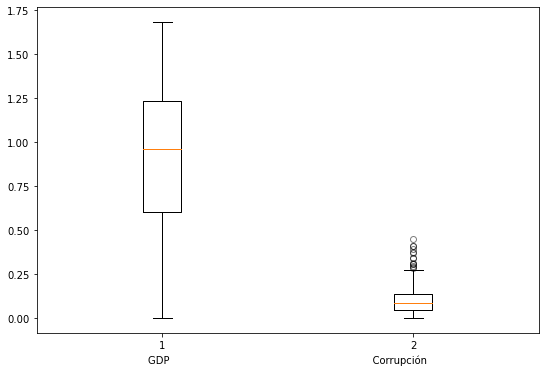

In [75]:
# Creando el objeto figura con matplotlib
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico al que añadiremos el grafico de cajas
ax = fig.add_subplot(111)

# Creando el grafico de cajas
bp = ax.boxplot(df[["GDP per capita","Perceptions of corruption"]])

# Visualizar mas facilmente los datos atípicos
# En 'fliers' se guardan aquellos datos que se encuentran más aislados de los demás (outliers)
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5) # Los dibujamos con un marcador especial

ax.set_xlabel(xlabel='GDP                                                                 Corrupción')

-Tabla de frecuencias

--Variables cualitativas

In [16]:
df.describe(include="O")

,Country or region,Group of countries
count,156,142
unique,156,3
top,Finland,primer grupo
freq,1,61


In [29]:
# Primero agrupamos el dataframe por la columna.
df_country = df.groupby("Group of countries",) #Devolvera un objeto DataFrameGroupBy
print(df_country)
# Aplicamos el método agg para agregar los datos por la columa.
frecuencias_pais = df_country.agg(frecuencia=("Group of countries", "count")).T
# Imprimimos por pantalla el resultado de la agrupación y agregación
print(frecuencias_pais)

Group of countries  primer grupo  segundo grupo  tercer grupo
frecuencia                    69             45            42


--Variables cuantitativas

In [34]:
cuantitativa_gdp = df.groupby("Group of countries")
cuantitativa_gdp1 =  cuantitativa_gdp.agg(frecuencia=("Group of countries", "count"))
cuantitativa_gdp1

,frecuencia
Group of countries,
primer grupo,69
segundo grupo,45
tercer grupo,42


In [19]:
df.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Group of countries
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,primer grupo
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,primer grupo


In [31]:
df["Groups healthy"] = pd.cut(df["Healthy life expectancy"], bins=5)
groups_healthy = df.groupby("Groups healthy")
df_groups_healthy =  groups_healthy.agg(frecuencia=("Healthy life expectancy", "count"))
df_groups_healthy

,frecuencia
Groups healthy,
"(-0.00114, 0.228]",4
"(0.228, 0.456]",23
"(0.456, 0.685]",31
"(0.685, 0.913]",63
"(0.913, 1.141]",35


--Frecuencia acumulada

In [25]:
#Calculamos una nueva columna del DataFrame llamada frecuencia acumulada usando cumsum() sobre la frecuencia
df_groups_healthy["frecuencia_acumulada"] = df_groups_healthy["frecuencia"].cumsum()
#Visualizamos el dataframe resultado
df_groups_healthy

,frecuencia,frecuencia_acumulada
Groups healthy,,
"(-0.00114, 0.228]",4,4
"(0.228, 0.456]",23,27
"(0.456, 0.685]",31,58
"(0.685, 0.913]",63,121
"(0.913, 1.141]",35,156


--Representación de al menos una tabla de frecuencias

<AxesSubplot:xlabel='Group of countries'>

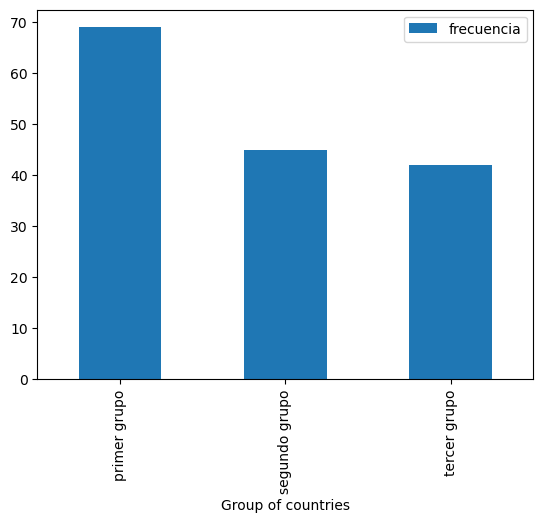

In [32]:
plt.rcdefaults()

# Aplicamos el método agg para agregar los datos por la columa species.
frecuencias_paises = df_country.agg(frecuencia=("Group of countries", "count")) 
# Pandas nos proporciona el metodo plot.bar() para hacer un gráfico de barras de manera sencilla
frecuencias_paises.plot.bar()

2. **Interpretación de los resultados.**

-Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

In [35]:
df.to_csv("tabla_happyness.csv")